In [31]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

In [32]:
def load_geojsons():
    
    folder_path = './geojsons/Nearest/'
    
    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)
    
    # Initialize an empty list to store the GeoDataFrames
    geojson_data = []
    
    for file_name in file_list:
        if file_name.endswith('.geojson'):  
            file_path = os.path.join(folder_path, file_name)
            data = gpd.read_file(file_path)      
            geojson_data.append(data)
            
    return geojson_data

In [33]:
def plot_geojson(geojson):
    
    color_mapping = {
    'Hevoset ja ponit, kuivalanta yhteensä varastosta': '#1f77b4',
    'Nautojen lietelanta eläinsuojasta 2015': '#ff7f0e',
    'Lihakarjan lietelanta eläinsuojasta' : '#ff7f0e',
    'Lihakarjan kuivalanta yhteensä varastosta': '#2ca02c',
    'Broilerit, kalkkunat ja muu siipikarja kuivalanta yhteensä varastosta' : '#d62728',
    'Emakot ja porsaat lietelanta eläinsuojasta' : '#9467bd',
    'Sikojenkuivalantavarastosta2016' : '#8c564b',
    'Emakot ja porsaat kuivalanta yhteensä varastosta' : '#8c564b',
    'Sivuvirta: Kesantonurmi' : '#e377c2',
    'Sivuvirta: Olki' : '#7f7f7f',
    'Sivuvirta: Kuivaheinänurmet': '#17becf'}
        
    unique_colors = list(set(color_mapping.values()))  # Get unique colors from the color mapping
    
    fig, ax = plt.subplots(figsize=(15, 10))
    handles = []  # Store legend handles for unique colors

    for index, row in geojson.iterrows():
        color = color_mapping.get((row['Type']).strip(), 'k')  # Use black color if type not found in mapping
        ax.plot(row['geometry'].x, row['geometry'].y, marker='o', markersize=8, color=color)
        # Store the legend handle only once for each unique color
        if color in unique_colors:
            handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8))
            unique_colors.remove(color)
        
    # Create a legend
    legend_labels = color_mapping.keys()
    ax.legend(handles, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

    # Set plot title and labels (customize as needed)
    ax.set_title('Pick up sites for different biomass types')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    plt.tight_layout()
    fig.savefig('allpickupsites.pdf',dpi=200)
    
    # Show the plot
    plt.show()

In [34]:
def main():
    
    geojson_data = load_geojsons()
    
    # Concatenate all GeoDataFrames into a single GeoDataFrame
    combined_data = gpd.GeoDataFrame(pd.concat(geojson_data, ignore_index=True))
    
    # Save the combined GeoJSON to a file
    combined_data.to_file('nearest_pickup_sites.geojson', driver='GeoJSON')
    
    plot_geojson(combined_data)

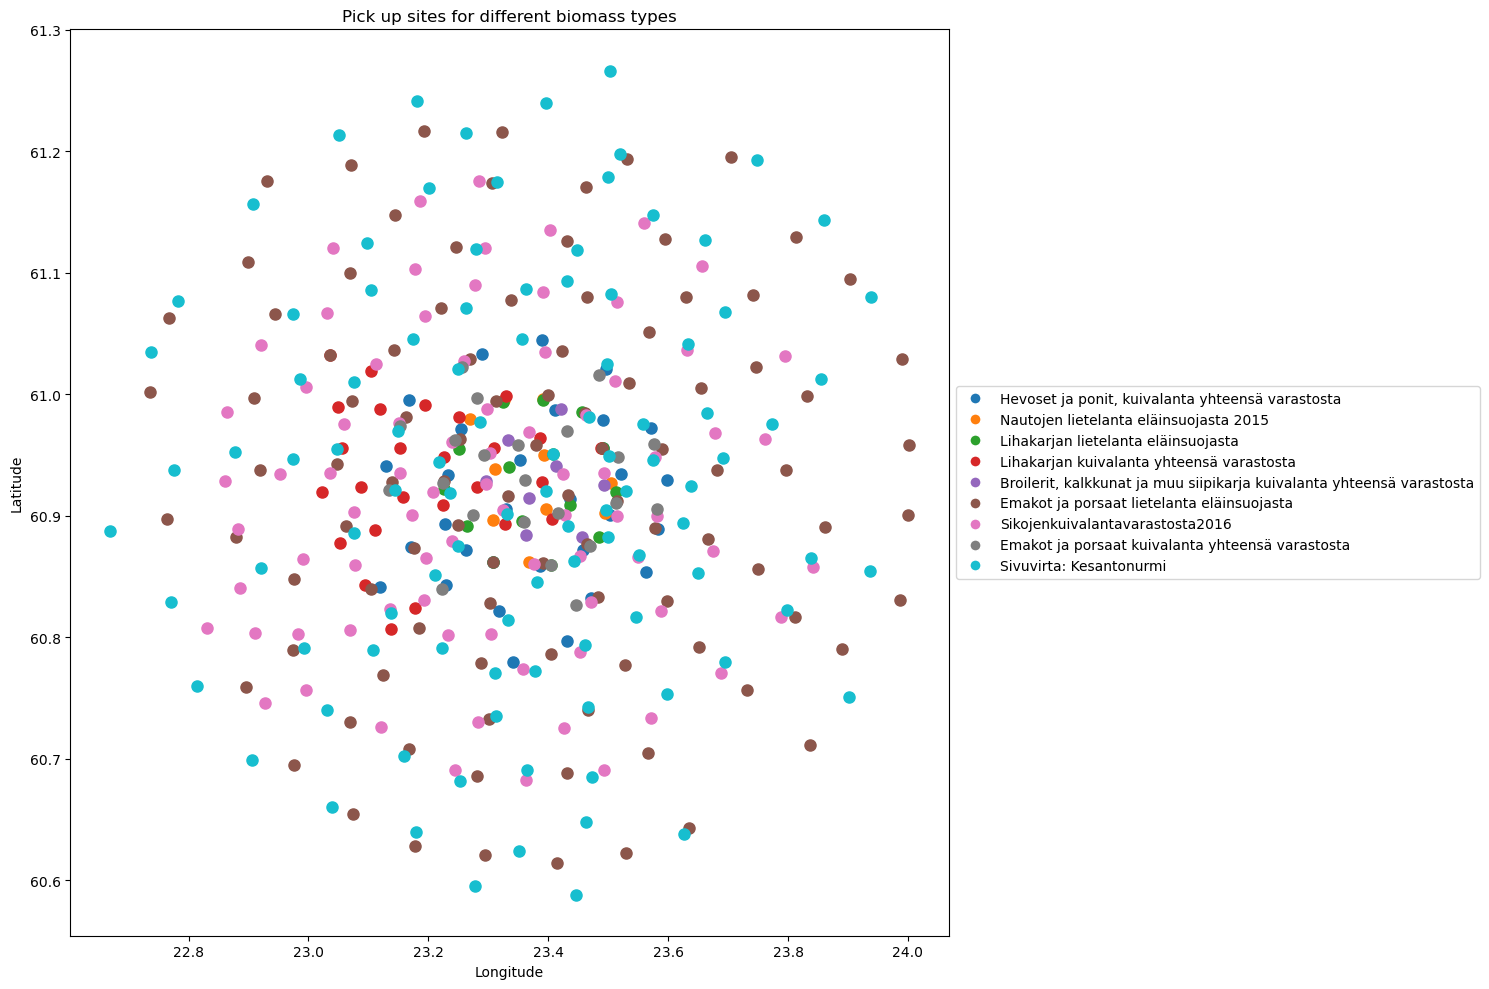

In [35]:
main()